In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
data= pd.read_csv('../Data/supermarket_data_aggr.csv')

In [9]:
# data.head()
# data.iloc[1]
# data['shops_used']

## Revenue per store

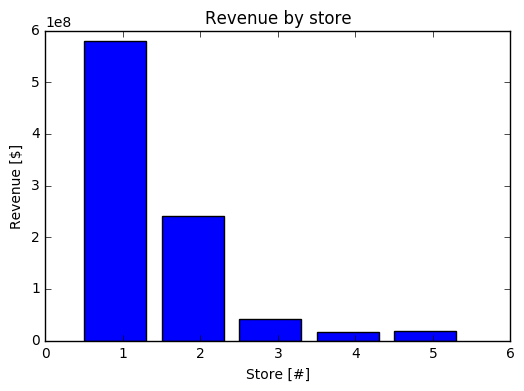

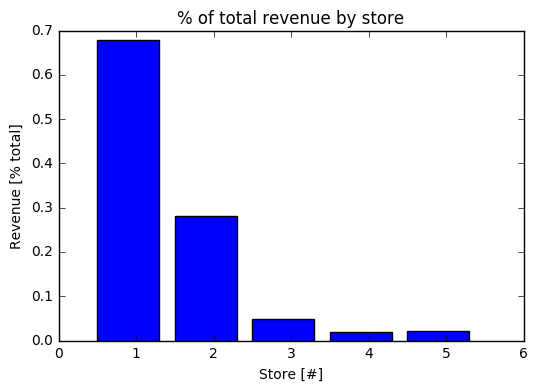

In [5]:

#calulate total revenue
amount='amount_purchased'
price='avg_price'
new = data[price]*data[amount]
total_revenue=new.sum()

#calculate revenue at each store
store_rev=[]
store_rev_perc=[]
for num in range(1,6):
    amount='amount_purchased_shop_' + str(num)
    price='avg_price_shop_' + str(num)
    new = data[price]*data[amount]
    store_rev.append(new.sum())
    store_rev_perc.append(new.sum()/total_revenue)

#revenue dollars
plt.bar(np.arange(1,6)-.5,store_rev)
plt.xlabel('Store [#]')
plt.ylabel('Revenue [$]')
plt.title('Revenue by store')
plt.show()

#revenue percent total
plt.bar(np.arange(1,6)-.5,store_rev_perc)
plt.xlabel('Store [#]')
plt.ylabel('Revenue [% total]')
plt.title('% of total revenue by store')
plt.show()

#### Interesting: 
Store 1 provides over 60% of total revenue, store 2 provides 30%, and stores 3-5 provide less than ~5% each.
This leads me to a couple questions.

#### Question I can not answer with this data.
1. How much does it cost to run a store? (i.e. are stores 3-5 profitable?)

#### Questions I want to answer with this data.
1. Why do customers choose store 1? (location or products)
1. Can customer needs RE: stores 3-5 be met by stores 1-2?

## Is the closest store also the primary store?

Primary store is the store with Most Revenue.

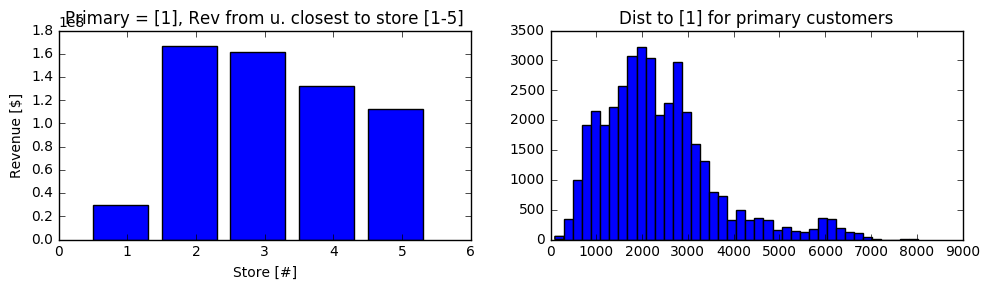

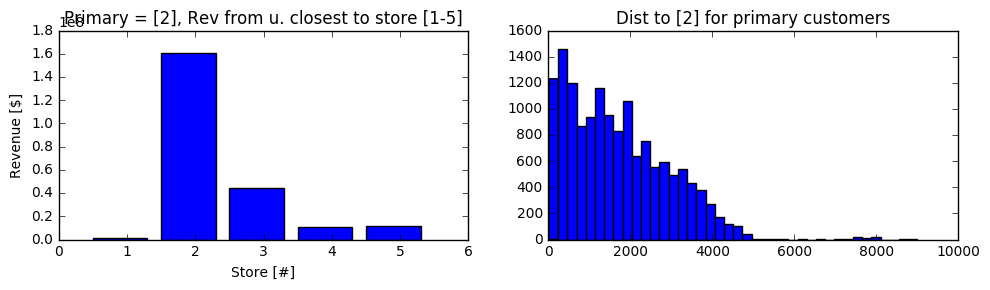

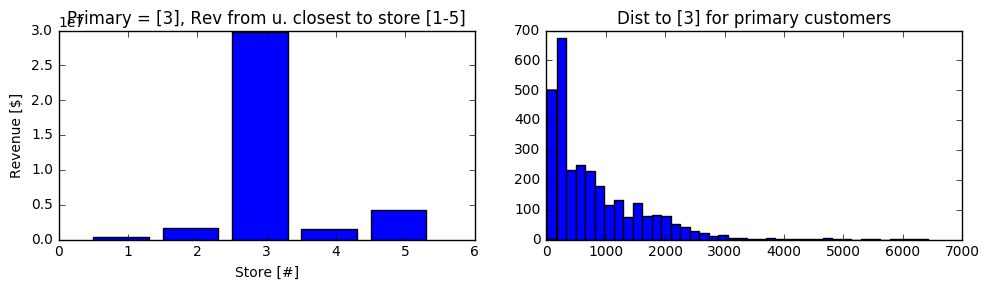

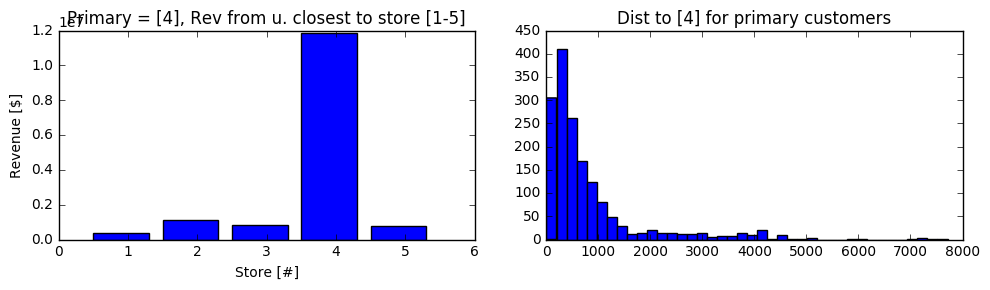

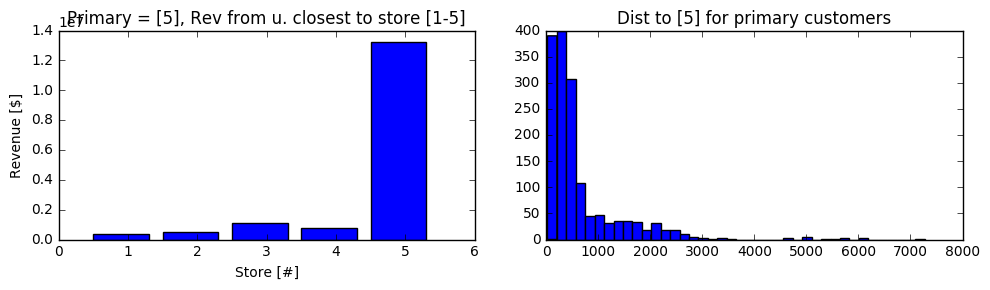

In [10]:
#find closest store.
dist=data.iloc[:,10:15].values
distid=np.argmin(dist,axis=1)

#find primary store
amount=data.iloc[:,25:30].values
price=data.iloc[:,35:40].values

rev=np.multiply(amount,price)
primid=np.argmax(rev,axis=1)

store_dist=[]
for i in range(0,5):
    temprev=rev[primid==i]
    tempid=distid[primid==i]
    tempdist=dist[primid==i,i]
    dist_rev=[]
    for j in range(0,5):
        dist_rev.append(np.nansum(temprev[tempid==j]))
    fig, ax=plt.subplots(1,2,figsize=[10,3])
    ax[0].bar(np.arange(1,6)-.5,dist_rev)
    ax[0].set_xlabel('Store [#]')
    ax[0].set_ylabel('Revenue [$]')
    ax[0].set_title('Primary = [%i], Rev from u. closest to store [1-5]' %(i+1))
    ax[1].hist(tempdist,40)
    ax[1].set_title('Dist to [%i] for primary customers' %(i+1))
    plt.tight_layout()
    plt.show()
    store_dist.append(np.nanmean(tempdist))
    

## Result 1: Users will travel to Store 1, even if there are stores closer.

##### Questions:
1. Do customers choose store 1 because it has a better selection of products?
    1. Is the unique products selection larger at store 1?
    1. Are the prices better at store 1? (we can't assume the purchases are the same)
    1. Do people do bulk purchases at store 1, and then small purchases at other stores?

### Do people buy most items at store 1, then smaller items (butter, milk, eggs) at other stores?

Given the customer is closest to store 1


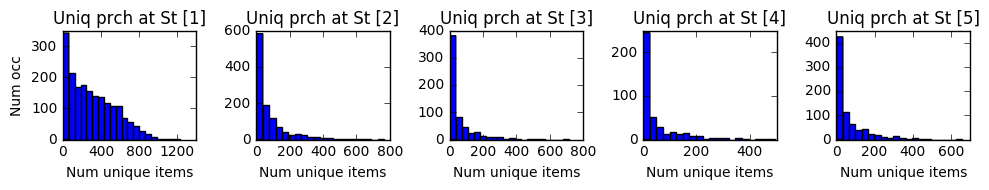

Given the customer is closest to store 2


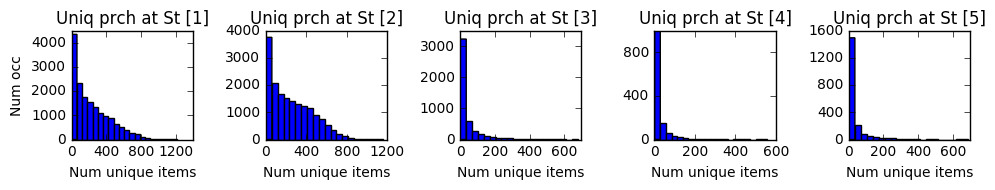

Given the customer is closest to store 3


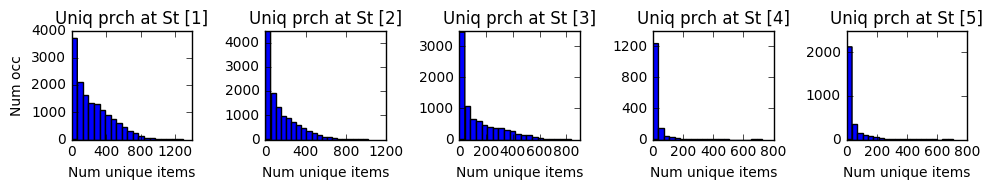

Given the customer is closest to store 4


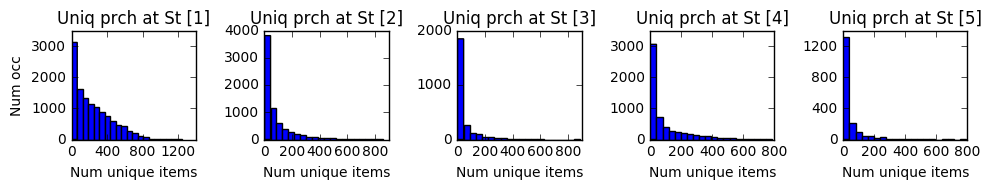

Given the customer is closest to store 5


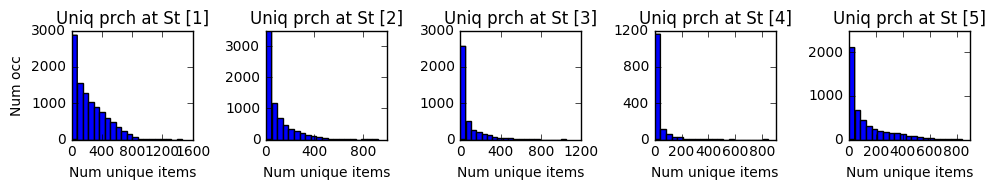

In [7]:
#find closest store.
dist=data.iloc[:,10:15].values
distid=np.argmin(dist,axis=1)

#find primary store
amount=data.iloc[:,25:30].values
price=data.iloc[:,35:40].values
rev=np.multiply(amount,price)
primid=np.argmax(rev,axis=1)

#find unique products by store
unique=data.iloc[:,20:25].values


store_dist=[]
for i in range(0,5):
    temprev=rev[primid==i]
    tempid=distid[primid==i]
    tempdist=dist[primid==i,i]
    tempunique=unique[distid==i]
    dist_rev=[]
    fig, ax=plt.subplots(1,5,figsize=[10,2])
    for j in range(0,5):
        #remove zero occurances
        temp2unique=tempunique[:,j][tempunique[:,j]>0]
        ax[j].hist(temp2unique,20)
        ax[j].set_xticks(ax[j].get_xticks()[::2])
        ax[j].set_yticks(ax[j].get_yticks()[::2])
        ax[j].set_xlabel('Num unique items')
        ax[j].set_title('Uniq prch at St [%i]'  %(j+1))
            
    ax[0].set_ylabel('Num occ')
    print 'Given the customer is closest to store ' + str(i+1)
    plt.tight_layout()
    plt.show()
    


## Result 2: Users normally travel to store 1 for purchasing lots of unique items, then make purchases smaller number of purchases at their local store.

## Result 3: Users are able to find ~800 items stores 3-5. Store 1-2 have 1200+ items.

#### People know their local store exists, but still travel to store 1 for major purchases.
 

# Are users avoiding local stores because of prices?

We know that customers are purchasing different items at different stores. We can't estimate prices at various stores.

However, if we restrict our analysis to customers who only purchased 10 items (e.g. butter, milk, eggs) or less at a given store, we may understand how the prices vary by store.

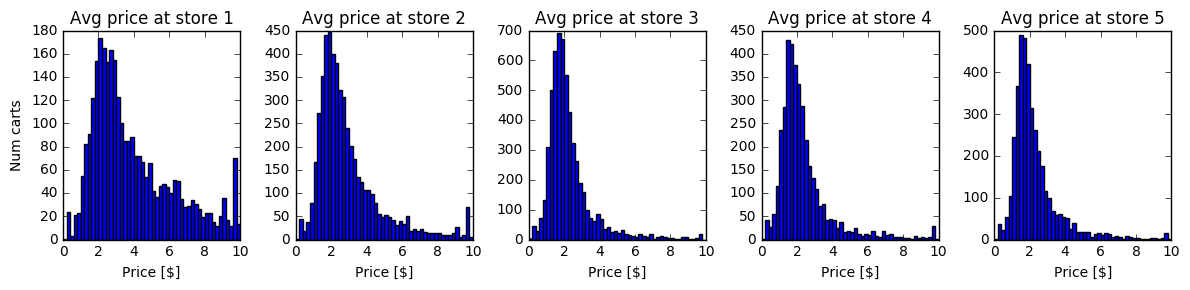

In [8]:
#find closest store.
dist=data.iloc[:,10:15].values
distid=np.argmin(dist,axis=1)

#find primary store
amount=data.iloc[:,25:30].values
price=data.iloc[:,35:40].values
rev=np.multiply(amount,price)
primid=np.argmax(rev,axis=1)

#find unique products by store
unique=data.iloc[:,20:25].values

price[unique>10]=np.NAN
price[price==0]=np.NAN

fig,ax=plt.subplots(1,5,figsize=[12,3])
for i in range(0,5):
    tempprice=price[:,i]
    tempprice=tempprice[~np.isnan(tempprice)]
    ax[i].hist(tempprice,50,range=[0,10])
    ax[i].set_title('Avg price at store %i' %(i+1))
    ax[i].set_xlabel('Price [$]')
#     plt.xlim([0,100])
ax[0].set_ylabel('Num carts')
plt.tight_layout()
plt.show()


# Result 4: Users are not traveling to store 1 for Better prices. 

### Assuming similar makeup of a Cart with less than 10 items, the prices are not different.
### This is judging only by eye. Testing for statistical significance would be better suited if we compare prices of the SAME item (i.e. not assuming carts with less than 10 items are the same items)



# Summary
### Result 1: Users will travel to Store 1, even if there are stores closer.
### Result 2: Users normally travel to store 1 for purchasing lots of unique items, then make purchases smaller number of purchases at their local store.
### Result 3: Users are able to find ~800 items stores 3-5. Store 1-2 have 1200+ items.
### Result 4: Users are probably not traveling to store 1 for Better prices. 


## Actionable insights:
#### Not enough data to understand which is better option

1. Advertise the products available at local stores.
    - Data needed: Surveys about products/reasons drawing employees to store 1.
1. Fill out stores so that full selection is available at each store.
    - Data needed: Which products are being purchased at store 1, and not at other stores.
1. Cut down on retail space by providing only essentials at local stores
    - Data needed: Makeup of carts from people leaving stores 3-5, and size required for those items.
    - Data needed: Cost per square foot of stores.
1. Close underperforming stores.
    - Data needed: Costs associated with stores. 

#### Specific information needed: Is the goal to remove underperforming stores, cut down the size of unerperforming stores, improve the performance of underperforming stores?